# ENVIRONMENT

In [1]:
# Basic libs
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns

# Datetime
from datetime import timedelta  

# Time series analysis
from fbprophet import Prophet

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

%matplotlib inline

# Custom scripts
import acquire
import prepare


# GOALS:
## <li> Understand the change of the child population in Texas.
### <ol> 1. What trends do we see? 
### <ol> 2. What anomalies can we find?
## <li> Predict child population growth in Texas.
## <li> Compare population growth data to the DFPS and immigration data and see if there is any correlation between these two (immigration and dfps cases) and the child population growth.

## We use data from Texas Department of Family and Protective Service (DFPS), which can be found online at the Texas data portal. Data is for 2008-2018.

# Data Dictionary:
<li> Child - any child aged 0-17 years old
<li> County - an administrative or political subdivision of a state
<li> UAC - Unaccompanied Alien Child - child (0-17 years old) without parents or guardians
<li> growth: County-level population growth from 2000 to 2010.
<li> FIPS: FIPS code.
<li> pop2010: 2010 county population.
<li> pop2000: 2000 county population.
<li> age_under_5: Percent of population under 5 (2010).
<li> age_under_18: Percent of population under 18 (2010).
<li> age_over_65: Percent of population over 65 (2010).
<li> female: Percent of population that is female (2010).
<li> black: Percent of population that is black (2010).
<li> hispanic: Percent of population that is Hispanic (2010).
<li> white_not_hispanic: Percent of population that is white and not Hispanic (2010).
<li> no_move_in_one_plus_year: Percent of population that has not moved in at least one year (2006-2010).
<li> foreign_born: Percent of population that is foreign-born (2006-2010).
<li> foreign_spoken_at_home: Percent of population that speaks a foreign language at home (2006-2010).
<li> hs_grad: Percent of population that is a high school graduate (2006-2010).
<li> bachelors: Percent of population that earned a bachelor's degree (2006-2010).
<li> mean_work_travel: Mean travel time to work (2006-2010).
<li> home_ownership: Homeownership rate (2006-2010).
<li> housing_multi_unit: Housing units in multi-unit structures (2006-2010).
<li> median_val_owner_occupied: Median value of owner-occupied housing units (2006-2010).
<li> persons_per_household: Persons per household (2006-2010).
<li> per_capita_income: Per capita money income in past 12 months (2010 dollars, 2006-2010).
<li> poverty: Percent below poverty level (2006-2010).
<li> sales_per_capita: Retail sales per capita, 2007.
<li> density: Persons per square mile (2010).

# DFPS TX POPULATION DATA 2008-2018


#### Original data: https://data.texas.gov/Social-Services/CPS-1-1-Texas-Child-Population-ages-0-17-by-County/x5xb-idr6
#### This is data on general population and the child population of Texas.

In [2]:
dfps = acquire.get_population_data()

In [3]:
dfps.head()

,Year,County,Region,Child Population,% of Children in Total Population,Total Population
0,2008,Anderson,4-Tyler,11237.0,19.91,56445
1,2008,Andrews,9-Midland,3821.0,27.47,13908
2,2008,Angelina,5-Beaumont,22131.0,26.64,83083
3,2008,Aransas,11-Edinburg,5020.0,19.82,25327
4,2008,Archer,2-Abilene,2216.0,23.96,9248


### Fix the names of the columns

In [4]:
dfps = prepare.fix_col_names(dfps)

In [5]:
dfps.head()

,year,county,region,child population,% of children in total population,total population
0,2008,Anderson,4-Tyler,11237.0,19.91,56445
1,2008,Andrews,9-Midland,3821.0,27.47,13908
2,2008,Angelina,5-Beaumont,22131.0,26.64,83083
3,2008,Aransas,11-Edinburg,5020.0,19.82,25327
4,2008,Archer,2-Abilene,2216.0,23.96,9248


In [6]:
dfps = prepare.rename_dfps_cols(dfps)

In [7]:
dfps.head()

,year,county,region,child_pop,perct_children,tot_pop
0,2008,Anderson,4-Tyler,11237.0,19.91,56445
1,2008,Andrews,9-Midland,3821.0,27.47,13908
2,2008,Angelina,5-Beaumont,22131.0,26.64,83083
3,2008,Aransas,11-Edinburg,5020.0,19.82,25327
4,2008,Archer,2-Abilene,2216.0,23.96,9248


In [8]:
dfps = prepare.fix_counties(dfps)

In [9]:
dfps.head()

,year,county,region,child_pop,perct_children,tot_pop
0,2008,anderson,4-Tyler,11237.0,19.91,56445
1,2008,andrews,9-Midland,3821.0,27.47,13908
2,2008,angelina,5-Beaumont,22131.0,26.64,83083
3,2008,aransas,11-Edinburg,5020.0,19.82,25327
4,2008,archer,2-Abilene,2216.0,23.96,9248


### Look at the value counts of the counties.

In [10]:
dfps.county.value_counts()

yoakum        11
sutton        11
brewster      11
victoria      11
coleman       11
johnson       11
king          11
lipscomb      11
webb          11
howard        11
gillespie     11
coke          11
brown         11
chambers      11
somervell     11
reeves        11
menard        11
sterling      11
fisher        11
bee           11
starr         11
baylor        11
hutchinson    11
brazoria      11
rains         11
jackson       11
sherman       11
scurry        11
liveoak       11
mcculloch     11
              ..
cottle        11
cass          11
rockwall      11
guadalupe     11
duval         11
hays          11
limestone     11
kinney        11
lee           11
erath         11
childress     11
jimwells      11
jones         11
mcmullen      11
palopinto     11
nueces        11
harris        11
hunt          11
maverick      11
bell          11
hale          11
hood          11
ochiltree     11
mills         11
vanzandt      11
garza         11
glasscock     11
terry         

### There is a typo in the data. McLennon county should be spelled as McLennan.

In [11]:
prepare.fix_mclennan_typo(dfps)

,year,county,region,child_pop,perct_children,tot_pop
0,2008,anderson,4-Tyler,11237.0,19.91,56445
1,2008,andrews,9-Midland,3821.0,27.47,13908
2,2008,angelina,5-Beaumont,22131.0,26.64,83083
3,2008,aransas,11-Edinburg,5020.0,19.82,25327
4,2008,archer,2-Abilene,2216.0,23.96,9248
5,2008,armstrong,1-Lubbock,502.0,22.89,2193
6,2008,atascosa,8-San Antonio,12615.0,28.78,43829
7,2008,austin,6-Houston,6705.0,24.59,27270
8,2008,bailey,1-Lubbock,1877.0,29.87,6283
9,2008,bandera,8-San Antonio,4080.0,20.08,20314


In [12]:
dfps[dfps.county == 'mclennon'].county

Series([], Name: county, dtype: object)

In [13]:
dfps[dfps.county == 'mclennan']

,year,county,region,child_pop,perct_children,tot_pop
160,2008,mclennan,7-Austin,57052.0,24.97,228497
415,2009,mclennan,7-Austin,57237.0,24.87,230145
670,2010,mclennan,7-Austin,59745.0,25.43,234906
925,2011,mclennan,7-Austin,60025.0,25.35,236795
1180,2012,mclennan,7-Austin,60183.0,25.21,238684
1435,2013,mclennan,7-Austin,60427.0,25.11,240621
1690,2014,mclennan,7-Austin,60883.0,25.10,242575
1945,2015,mclennan,7-Austin,61339.0,25.08,244576
2200,2016,mclennan,7-Austin,61843.0,25.07,246680
2455,2017,mclennan,7-Austin,62140.0,24.98,248752


### Fix the datatypes of the columns. Change the year to a datetime and add new columns with the year. 

In [14]:
dfps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 6 columns):
year              2805 non-null int64
county            2805 non-null object
region            2805 non-null object
child_pop         2794 non-null float64
perct_children    2794 non-null float64
tot_pop           2805 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 131.6+ KB


In [15]:
dfps = prepare.fix_dates(dfps)

In [16]:
dfps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 7 columns):
datetime          2805 non-null datetime64[ns]
county            2805 non-null object
region            2805 non-null object
child_pop         2794 non-null float64
perct_children    2794 non-null float64
tot_pop           2805 non-null int64
year              2805 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 153.5+ KB


In [17]:
dfps.head()

,datetime,county,region,child_pop,perct_children,tot_pop,year
0,2008-01-01,anderson,4-Tyler,11237.0,19.91,56445,2008
1,2008-01-01,andrews,9-Midland,3821.0,27.47,13908,2008
2,2008-01-01,angelina,5-Beaumont,22131.0,26.64,83083,2008
3,2008-01-01,aransas,11-Edinburg,5020.0,19.82,25327,2008
4,2008-01-01,archer,2-Abilene,2216.0,23.96,9248,2008


### Checking for nulls

In [18]:
dfps.isnull().sum()

datetime           0
county             0
region             0
child_pop         11
perct_children    11
tot_pop            0
year               0
dtype: int64

### Checking for the unique types of values in the region column

In [19]:
dfps.region.value_counts()

1-Lubbock        451
2-Abilene        330
9-Midland        330
7-Austin         330
8-San Antonio    308
4-Tyler          253
3-Arlington      209
11-Edinburg      209
5-Beaumont       165
6-Houston        143
10-El Paso        66
All Regions       11
Name: region, dtype: int64

### Now that the datatypes are fixed, change the region into two separate columns that contain region id (numeric) and region name. But drop region id (numeric) because it is redundant.

In [20]:
dfps = prepare.fix_region(dfps)

In [21]:
dfps.head()

,datetime,county,region,child_pop,perct_children,tot_pop,year
0,2008-01-01,anderson,Tyler,11237.0,19.91,56445,2008
1,2008-01-01,andrews,Midland,3821.0,27.47,13908,2008
2,2008-01-01,angelina,Beaumont,22131.0,26.64,83083,2008
3,2008-01-01,aransas,Edinburg,5020.0,19.82,25327,2008
4,2008-01-01,archer,Abilene,2216.0,23.96,9248,2008


In [22]:
dfps.region.value_counts()

Lubbock        451
Austin         330
Midland        330
Abilene        330
San Antonio    308
Tyler          253
Arlington      209
Edinburg       209
Beaumont       165
Houston        143
El Paso         66
Name: region, dtype: int64

### Take all these rows with "All Counties" and drop them. These were aggregations in the origin data.

In [23]:
dfps = prepare.drop_agg_counties(dfps)

In [24]:
dfps.head()

,datetime,county,region,child_pop,perct_children,tot_pop,year
0,2008-01-01,anderson,Tyler,11237.0,19.91,56445,2008
1,2008-01-01,andrews,Midland,3821.0,27.47,13908,2008
2,2008-01-01,angelina,Beaumont,22131.0,26.64,83083,2008
3,2008-01-01,aransas,Edinburg,5020.0,19.82,25327,2008
4,2008-01-01,archer,Abilene,2216.0,23.96,9248,2008


### Checking for the unique types of values in the region column

In [25]:
dfps.region.value_counts()

Lubbock        451
Austin         330
Midland        330
Abilene        330
San Antonio    308
Tyler          253
Arlington      209
Edinburg       209
Beaumont       165
Houston        143
El Paso         66
Name: region, dtype: int64

### Checking for nulls

In [26]:
dfps.isnull().sum()

datetime          0
county            0
region            0
child_pop         0
perct_children    0
tot_pop           0
year              0
dtype: int64

In [27]:
dfps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2794 entries, 0 to 2803
Data columns (total 7 columns):
datetime          2794 non-null datetime64[ns]
county            2794 non-null object
region            2794 non-null object
child_pop         2794 non-null float64
perct_children    2794 non-null float64
tot_pop           2794 non-null int64
year              2794 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 174.6+ KB


In [28]:
dfps.set_index('datetime', inplace=True)

In [29]:
dfps.resample('Y')

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

In [30]:
dfps.head()

,county,region,child_pop,perct_children,tot_pop,year
datetime,,,,,,
2008-01-01,anderson,Tyler,11237.0,19.91,56445,2008
2008-01-01,andrews,Midland,3821.0,27.47,13908,2008
2008-01-01,angelina,Beaumont,22131.0,26.64,83083,2008
2008-01-01,aransas,Edinburg,5020.0,19.82,25327,2008
2008-01-01,archer,Abilene,2216.0,23.96,9248,2008


In [31]:
dfps.county.value_counts()

yoakum        11
sutton        11
brewster      11
victoria      11
coleman       11
johnson       11
king          11
lipscomb      11
webb          11
howard        11
gillespie     11
coke          11
brown         11
chambers      11
somervell     11
reeves        11
menard        11
sterling      11
fisher        11
bee           11
starr         11
baylor        11
hutchinson    11
brazoria      11
rains         11
jackson       11
sherman       11
scurry        11
liveoak       11
mcculloch     11
              ..
coryell       11
glasscock     11
roberts       11
cottle        11
cass          11
rockwall      11
guadalupe     11
duval         11
hays          11
limestone     11
kinney        11
lee           11
erath         11
childress     11
jimwells      11
jones         11
mcmullen      11
palopinto     11
nueces        11
harris        11
hunt          11
maverick      11
bell          11
hale          11
hood          11
ochiltree     11
mills         11
vanzandt      

In [32]:
len(dfps.year.value_counts())

11

In [33]:
dfps.region.value_counts()

Lubbock        451
Austin         330
Midland        330
Abilene        330
San Antonio    308
Tyler          253
Arlington      209
Edinburg       209
Beaumont       165
Houston        143
El Paso         66
Name: region, dtype: int64

# There are 11 years of data. There are 254 counties in the df (equals to all counties in TX). There are 11 regions (cities/metropolitan areas).

In [34]:
dfps.year.value_counts()

2017    254
2015    254
2013    254
2011    254
2009    254
2018    254
2016    254
2014    254
2012    254
2010    254
2008    254
Name: year, dtype: int64

In [35]:
dfps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2794 entries, 2008-01-01 to 2018-01-01
Data columns (total 6 columns):
county            2794 non-null object
region            2794 non-null object
child_pop         2794 non-null float64
perct_children    2794 non-null float64
tot_pop           2794 non-null int64
year              2794 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 152.8+ KB


In [36]:
dfps.head()

,county,region,child_pop,perct_children,tot_pop,year
datetime,,,,,,
2008-01-01,anderson,Tyler,11237.0,19.91,56445,2008
2008-01-01,andrews,Midland,3821.0,27.47,13908,2008
2008-01-01,angelina,Beaumont,22131.0,26.64,83083,2008
2008-01-01,aransas,Edinburg,5020.0,19.82,25327,2008
2008-01-01,archer,Abilene,2216.0,23.96,9248,2008


# EXPLORATORY DATA ANALYSIS WITH VISUALIZATIONS

## Visualize the change of children population over time across the regions.

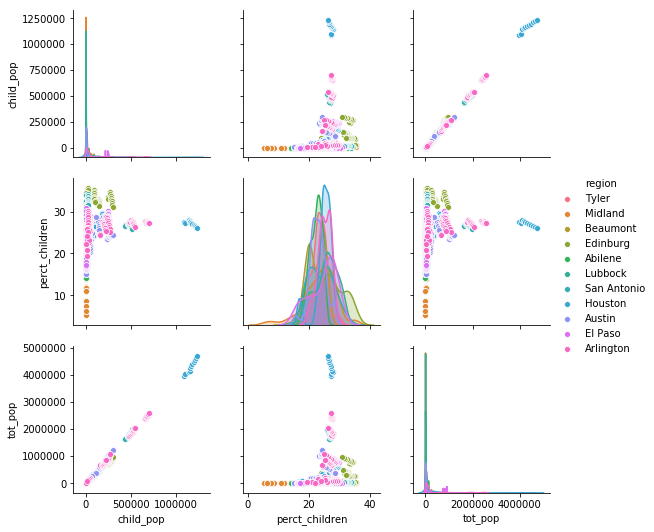

In [37]:
sns.pairplot(dfps.drop(columns='year'), hue='region')

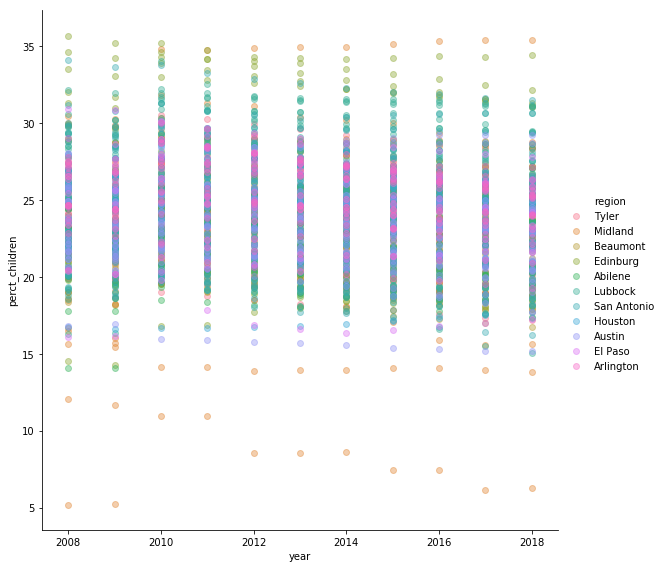

In [38]:
sns.set_palette('husl')

g = sns.FacetGrid(dfps, hue="region", height=8)
g.map(plt.scatter, 'year', 'perct_children', alpha=0.4)
g.add_legend()


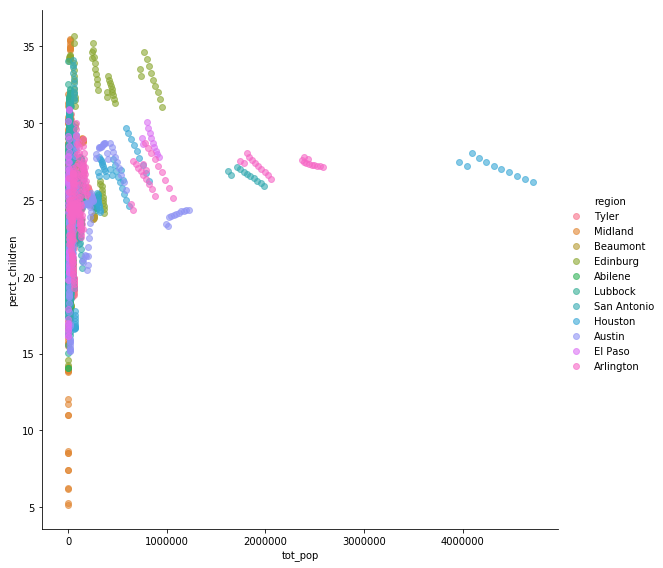

In [39]:
sns.set_palette('husl', 7)
g = sns.FacetGrid(dfps, hue="region", height=8)
g.map(plt.scatter, 'tot_pop', 'perct_children', alpha=0.6)
g.add_legend()


In [40]:
dfps.tot_pop.describe()

count    2.794000e+03
mean     1.051961e+05
std      3.733768e+05
min      5.700000e+01
25%      6.902250e+03
50%      1.898750e+04
75%      5.150300e+04
max      4.716479e+06
Name: tot_pop, dtype: float64

In [41]:
dfps.groupby(['year', 'region'])

In [42]:
dfps_by_yr_by_region = dfps.groupby(['year', 'region']).agg('sum')

In [43]:
dfps_by_yr_by_region

child_pop  perct_children  tot_pop
year region                                         
2008 Abilene       129918.0          662.08   547273
     Arlington    1787328.0          481.94  6623803
     Austin        687621.0          695.22  2815141
     Beaumont      181952.0          343.09   753854
     Edinburg      632538.0          514.22  2021188
     El Paso       223615.0          148.50   774524
     Houston      1582378.0          327.88  5859339
     Lubbock       209519.0         1030.15   815358
     Midland       142955.0          680.55   545368
     San Antonio   656179.0          701.35  2483977
     Tyler         261221.0          536.46  1087149
2009 Abilene       130622.0          658.16   552450
     Arlington    1813205.0          477.40  6770397
     Austin        697302.0          689.33  2877349
     Beaumont      181854.0          339.95   758730
     Edinburg      633106.0          508.21  2044913
     El Paso       222485.0          146.30   781204
     Houston      1600259.0          324.54  5990432
     Lubbock       210805.0         1023.20   825458
     Midland       144760.0          673.85   555206
     San Antonio   661421.0          693.65  2529527
     Tyler         261617.0          531.61  1096636
2010 Abilene       129373.0          694.06   550250
     Arlington    1860693.0          497.29  6733179
     Austin        739441.0          712.85  2948364
     Beaumont      184465.0          346.75   767222
     Edinburg      671080.0          516.19  2105700
     El Paso       247132.0          157.11   825913
     Houston      1692993.0          336.15  6087133
     Lubbock       220971.0         1106.98   839586
...                     ...             ...      ...
2016 Beaumont      190318.0          330.45   808167
     Edinburg      714490.0          494.73  2370249
     El Paso       257264.0          144.22   915995
     Houston      1828051.0          319.92  6946624
     Lubbock       235840.0         1038.63   899512
     Midland       161237.0          698.56   614031
     San Antonio   748085.0          657.04  2923361
     Tyler         280061.0          525.99  1186116
2017 Abilene       132625.0          658.92   571340
     Arlington    2034172.0          464.13  7755244
     Austin        869065.0          676.49  3495220
     Beaumont      191504.0          328.26   815056
     Edinburg      721797.0          490.98  2416831
     El Paso       259499.0          143.56   931965
     Houston      1852325.0          317.53  7103171
     Lubbock       238298.0         1029.88   909914
     Midland       162727.0          692.85   621166
     San Antonio   756473.0          652.93  2978568
     Tyler         281787.0          522.79  1198815
2018 Abilene       133098.0          656.55   574231
     Arlington    2055355.0          458.86  7919315
     Austin        886900.0          672.12  3581472
     Beaumont      192648.0          326.40   822135
     Edinburg      728007.0          489.11  2464582
     El Paso       262034.0          143.18   947668
     Houston      1873145.0          314.65  7262352
     Lubbock       240761.0         1025.05   920560
     Midland       164145.0          689.22   628255
     San Antonio   764193.0          649.18  3034265
     Tyler         283530.0          519.95  1211644

[121 rows x 3 columns]

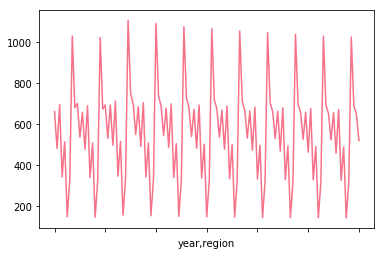

In [44]:
dfps_by_yr_by_region.perct_children.plot()

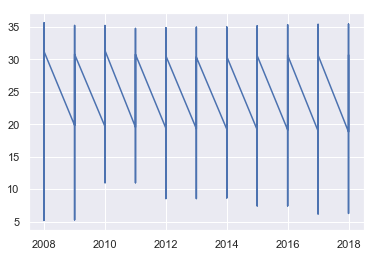

In [45]:
sns.set()
plt.plot(dfps.year, dfps.perct_children)

# DBSCAN

In [46]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [47]:
dfps_dbscan_df = dfps[['child_pop', 'tot_pop']]

In [48]:
np_array = dfps_dbscan_df.values.astype("float32", copy = False)
np_array[0:10]

array([[11237., 56445.],
       [ 3821., 13908.],
       [22131., 83083.],
       [ 5020., 25327.],
       [ 2216.,  9248.],
       [  502.,  2193.],
       [12615., 43829.],
       [ 6705., 27270.],
       [ 1877.,  6283.],
       [ 4080., 20314.]], dtype=float32)

In [49]:
stscaler = StandardScaler().fit(np_array)
np_array = stscaler.transform(np_array)
np_array[0:10]

array([[-0.16463421, -0.13059153],
       [-0.23777765, -0.24453704],
       [-0.05718755, -0.05923527],
       [-0.225952  , -0.21394852],
       [-0.25360763, -0.25701997],
       [-0.27051267, -0.27591848],
       [-0.15104312, -0.1643865 ],
       [-0.20933297, -0.20874374],
       [-0.25695115, -0.26496243],
       [-0.23522314, -0.22737704]], dtype=float32)

In [50]:
dbsc = DBSCAN(eps = .75, min_samples = 15).fit(np_array)

In [51]:
labels = dbsc.labels_
labels[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
dfps_dbscan_df['labels'] = labels
dfps_dbscan_df.labels.value_counts()

 0    2750
 1      22
-1      22
Name: labels, dtype: int64

In [53]:
dfps_dbscan_df[dfps_dbscan_df.labels==-1].head()

,child_pop,tot_pop,labels
datetime,,,
2008-01-01,663309.0,2387963,-1
2008-01-01,1088323.0,3965716,-1
2009-01-01,672235.0,2429276,-1
2009-01-01,1099750.0,4044032,-1
2010-01-01,654263.0,2368139,-1


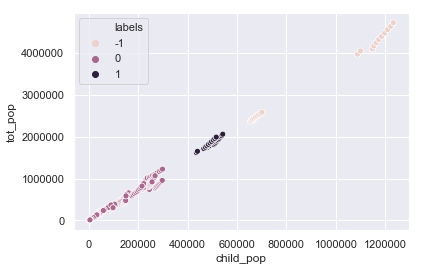

In [54]:
sns.scatterplot(dfps_dbscan_df.child_pop, dfps_dbscan_df.tot_pop, hue=dfps_dbscan_df.labels)
plt.show()

### This DBSCAN Visualization shows that the areas with the largest population have the largest child populations and the greatest proportion of children to the total population. (Steepest slope)

### How to isolate these groups found in the DBSCAN?

# Select only one Region to explore and do a DBSCAN

### There are 11 Regions. There are 254 counties.

In [55]:
dfps.head()

,county,region,child_pop,perct_children,tot_pop,year
datetime,,,,,,
2008-01-01,anderson,Tyler,11237.0,19.91,56445,2008
2008-01-01,andrews,Midland,3821.0,27.47,13908,2008
2008-01-01,angelina,Beaumont,22131.0,26.64,83083,2008
2008-01-01,aransas,Edinburg,5020.0,19.82,25327,2008
2008-01-01,archer,Abilene,2216.0,23.96,9248,2008


In [56]:
regions = list(dfps.region.value_counts().index)

In [57]:
regions

['Lubbock',
 'Austin',
 'Midland',
 'Abilene',
 'San Antonio',
 'Tyler',
 'Arlington',
 'Edinburg',
 'Beaumont',
 'Houston',
 'El Paso']

In [58]:
counties = list(dfps.county.value_counts().index)

In [59]:
counties

['yoakum',
 'sutton',
 'brewster',
 'victoria',
 'coleman',
 'johnson',
 'king',
 'lipscomb',
 'webb',
 'howard',
 'gillespie',
 'coke',
 'brown',
 'chambers',
 'somervell',
 'reeves',
 'menard',
 'sterling',
 'fisher',
 'bee',
 'starr',
 'baylor',
 'hutchinson',
 'brazoria',
 'rains',
 'jackson',
 'sherman',
 'scurry',
 'liveoak',
 'mcculloch',
 'wilson',
 'milam',
 'navarro',
 'hemphill',
 'presidio',
 'leon',
 'archer',
 'williamson',
 'zapata',
 'willacy',
 'angelina',
 'oldham',
 'bowie',
 'redriver',
 'lubbock',
 'dickens',
 'hudspeth',
 'mason',
 'fayette',
 'tomgreen',
 'armstrong',
 'fortbend',
 'swisher',
 'kaufman',
 'burnet',
 'shackelford',
 'lasalle',
 'franklin',
 'valverde',
 'edwards',
 'delta',
 'nacogdoches',
 'jack',
 'morris',
 'clay',
 'lavaca',
 'crane',
 'parmer',
 'andrews',
 'ward',
 'reagan',
 'robertson',
 'cochran',
 'collingsworth',
 'martin',
 'titus',
 'kimble',
 'gaines',
 'grimes',
 'comal',
 'lampasas',
 'wichita',
 'brazos',
 'throckmorton',
 'dimmit

## First select Lubbock

In [60]:
lubbock = dfps[dfps['region'] == 'Lubbock']

In [61]:
lubbock

,county,region,child_pop,perct_children,tot_pop,year
datetime,,,,,,
2008-01-01,armstrong,Lubbock,502.0,22.89,2193,2008
2008-01-01,bailey,Lubbock,1877.0,29.87,6283,2008
2008-01-01,briscoe,Lubbock,369.0,23.02,1603,2008
2008-01-01,carson,Lubbock,1455.0,22.85,6368,2008
2008-01-01,castro,Lubbock,2252.0,29.73,7576,2008
2008-01-01,childress,Lubbock,1722.0,22.37,7699,2008
2008-01-01,cochran,Lubbock,903.0,25.79,3501,2008
2008-01-01,collingsworth,Lubbock,664.0,21.99,3019,2008
2008-01-01,crosby,Lubbock,1757.0,27.87,6304,2008


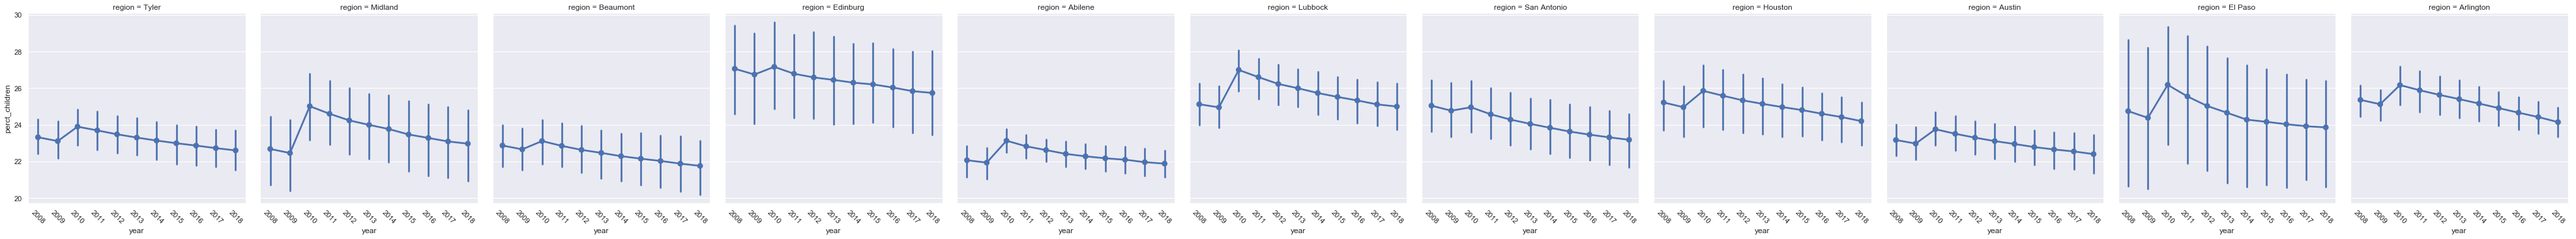

In [62]:
g = sns.factorplot(x='year', y='perct_children', data=dfps, col='region')
g.set_xticklabels(rotation=-45)
# g.set_title('Percentage of Children in Total Pop')

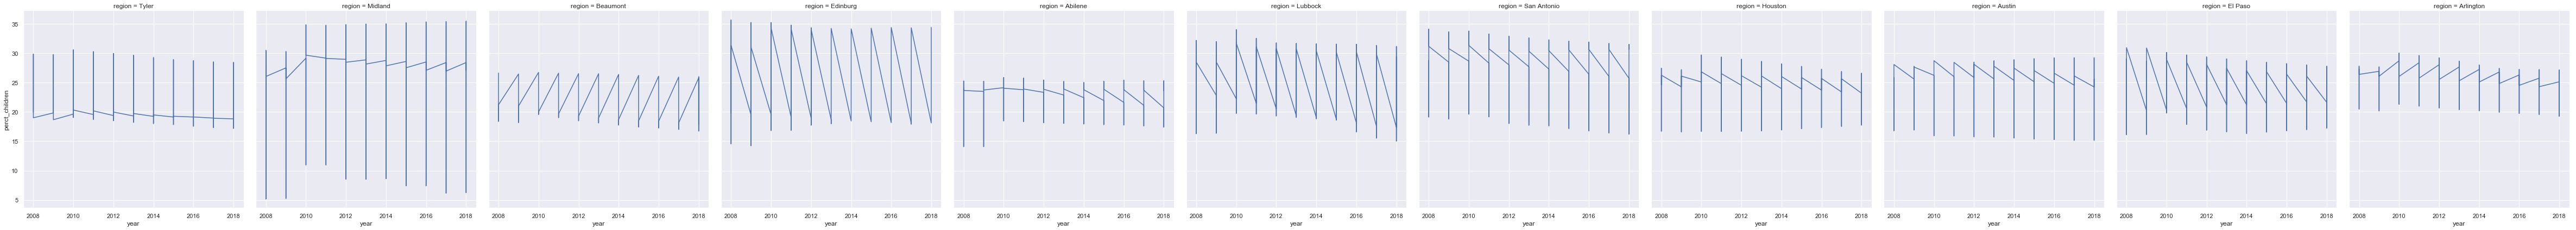

In [63]:
g = sns.FacetGrid(dfps, col='region', height=6)
g.map(plt.plot, 'year', 'perct_children')

In [64]:
lubbock.head()

,county,region,child_pop,perct_children,tot_pop,year
datetime,,,,,,
2008-01-01,armstrong,Lubbock,502.0,22.89,2193,2008
2008-01-01,bailey,Lubbock,1877.0,29.87,6283,2008
2008-01-01,briscoe,Lubbock,369.0,23.02,1603,2008
2008-01-01,carson,Lubbock,1455.0,22.85,6368,2008
2008-01-01,castro,Lubbock,2252.0,29.73,7576,2008


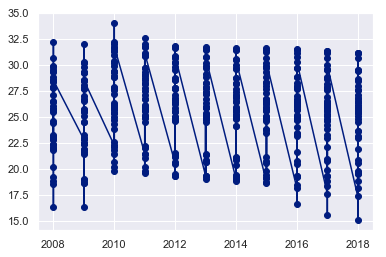

In [65]:
with plt.style.context('seaborn-dark-palette'):
    plt.plot('year', 'perct_children', '-o', data = lubbock)

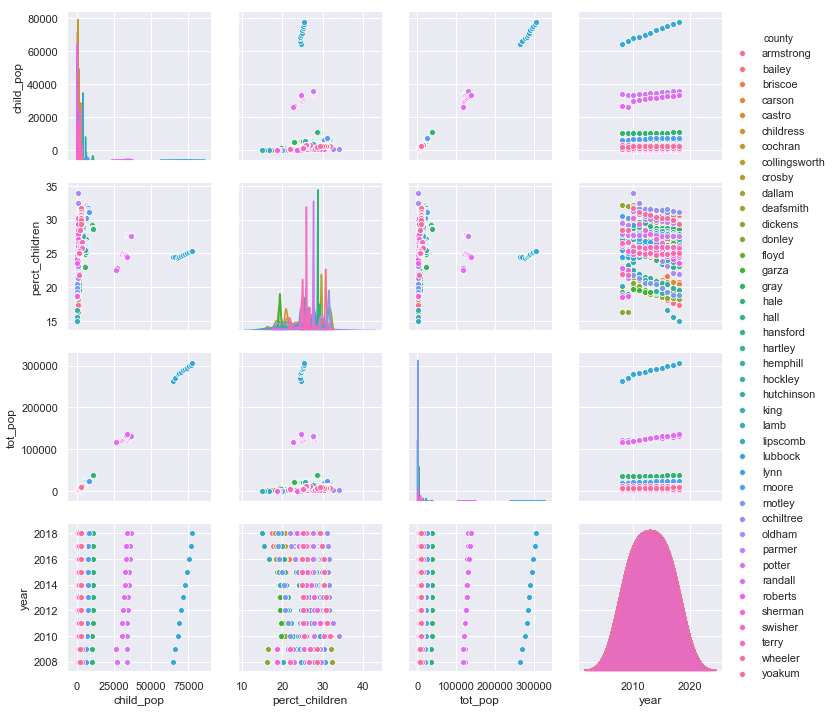

In [66]:
sns.pairplot(lubbock, hue='county')

In [67]:
lubbock.groupby('county').sum().sort_values(by='tot_pop')

,child_pop,perct_children,tot_pop,year
county,,,,
king,647.0,212.48,3353,22143
roberts,2501.0,263.46,10398,22143
motley,2724.0,219.05,13700,22143
briscoe,3951.0,238.65,18219,22143
armstrong,4404.0,220.11,21961,22143
oldham,6044.0,284.65,23443,22143
dickens,5100.0,203.62,27593,22143
collingsworth,8886.0,285.43,34220,22143
sherman,9493.0,299.05,34958,22143


# Lubbock DBSCAN

In [68]:
lubbock_dbscan_df = lubbock[['child_pop', 'tot_pop']]


In [69]:
np_array = lubbock_dbscan_df.values.astype("float32", copy = False)
np_array[0:10]


array([[ 502., 2193.],
       [1877., 6283.],
       [ 369., 1603.],
       [1455., 6368.],
       [2252., 7576.],
       [1722., 7699.],
       [ 903., 3501.],
       [ 664., 3019.],
       [1757., 6304.],
       [1821., 6312.]], dtype=float32)

In [70]:
stscaler = StandardScaler().fit(np_array)
np_array = stscaler.transform(np_array)
np_array[0:10]

array([[-0.4010511 , -0.3815628 ],
       [-0.29148102, -0.2994206 ],
       [-0.41164953, -0.39341217],
       [-0.3251091 , -0.2977135 ],
       [-0.2615983 , -0.2734524 ],
       [-0.30383256, -0.27098212],
       [-0.3690965 , -0.35529336],
       [-0.38814175, -0.3649737 ],
       [-0.3010435 , -0.29899883],
       [-0.29594353, -0.29883817]], dtype=float32)

In [71]:
dbsc = DBSCAN(eps = .75, min_samples = 15).fit(np_array)

In [72]:
labels = dbsc.labels_
labels[0:10]

lubbock_dbscan_df['labels'] = labels
lubbock_dbscan_df.labels.value_counts()

lubbock_dbscan_df[lubbock_dbscan_df.labels==-1].head()

,child_pop,tot_pop,labels
datetime,,,
2008-01-01,64755.0,263782,-1
2009-01-01,66103.0,270387,-1
2010-01-01,67862.0,278831,-1
2011-01-01,69000.0,282133,-1
2012-01-01,70190.0,285385,-1


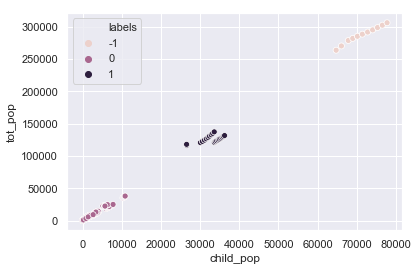

In [73]:
sns.scatterplot(lubbock_dbscan_df.child_pop, lubbock_dbscan_df.tot_pop, hue=lubbock_dbscan_df.labels)
plt.show()

# Select Abilene, which is the Region with the smallest total population

In [74]:
abilene = dfps[dfps['region'] == 'Abilene']

In [75]:
abilene

,county,region,child_pop,perct_children,tot_pop,year
datetime,,,,,,
2008-01-01,archer,Abilene,2216.0,23.96,9248,2008
2008-01-01,baylor,Abilene,790.0,20.04,3943,2008
2008-01-01,brown,Abilene,9107.0,23.53,38703,2008
2008-01-01,callahan,Abilene,3053.0,22.14,13789,2008
2008-01-01,clay,Abilene,2344.0,21.19,11064,2008
2008-01-01,coleman,Abilene,1958.0,22.59,8666,2008
2008-01-01,comanche,Abilene,3295.0,23.24,14180,2008
2008-01-01,cottle,Abilene,354.0,20.87,1696,2008
2008-01-01,eastland,Abilene,4003.0,22.00,18195,2008


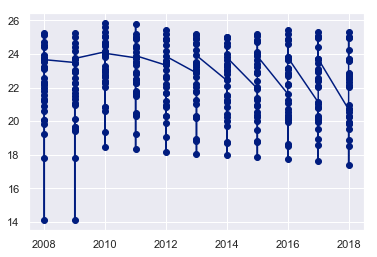

In [76]:
with plt.style.context('seaborn-dark-palette'):
    plt.plot('year', 'perct_children', '-o', data = abilene)

# Select Midland, which is the Region with the 2nd smallest total population

In [77]:
midland = dfps[dfps['region'] == 'Midland']

In [78]:
midland

,county,region,child_pop,perct_children,tot_pop,year
datetime,,,,,,
2008-01-01,andrews,Midland,3821.0,27.47,13908,2008
2008-01-01,borden,Midland,109.0,15.62,698,2008
2008-01-01,coke,Midland,732.0,19.04,3844,2008
2008-01-01,concho,Midland,450.0,12.07,3729,2008
2008-01-01,crane,Midland,1039.0,25.81,4026,2008
2008-01-01,crockett,Midland,1006.0,23.83,4221,2008
2008-01-01,dawson,Midland,3400.0,24.41,13926,2008
2008-01-01,ector,Midland,37761.0,28.86,130849,2008
2008-01-01,gaines,Midland,4689.0,30.47,15389,2008


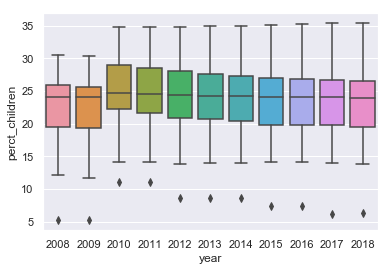

In [79]:
with plt.style.context('seaborn-dark-palette'):
    sns.boxplot(x='year', y='perct_children', data = midland)

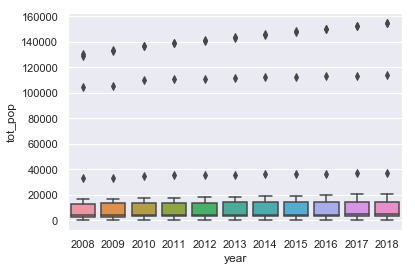

In [80]:
with plt.style.context('seaborn-dark-palette'):
    sns.boxplot(x='year', y='tot_pop', data = midland)

## Further explore the Midland region because the total population and the children population are different than the rest of the regions. 

### Research shows that this area has one of the fastest growing cities, Midland, TX in the USA: https://www.msn.com/en-us/money/realestate/america-fastest-growing-cities/ss-BBULyYT#image=23

In [81]:
mid_by_county_by_yr = midland.groupby(['county','year']).sum()

In [82]:
midland.isnull().sum()

county            0
region            0
child_pop         0
perct_children    0
tot_pop           0
year              0
dtype: int64

In [83]:
mid_by_county_by_yr.head()

child_pop  perct_children  tot_pop
county  year                                    
andrews 2008     3821.0           27.47    13908
        2009     3893.0           27.50    14156
        2010     4312.0           29.16    14786
        2011     4396.0           29.16    15076
        2012     4443.0           28.96    15343

In [84]:
mid_by_county_by_yr.xs('andrews', level='county')

,child_pop,perct_children,tot_pop
year,,,
2008,3821.0,27.47,13908
2009,3893.0,27.50,14156
2010,4312.0,29.16,14786
2011,4396.0,29.16,15076
2012,4443.0,28.96,15343
2013,4504.0,28.87,15603
2014,4563.0,28.77,15861
2015,4614.0,28.60,16133
2016,4670.0,28.51,16383


Text(0.5, 1.0, 'Andrews County Percentage of Children in Total Pop')

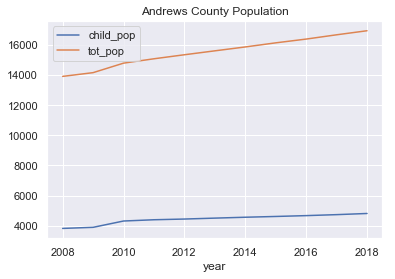

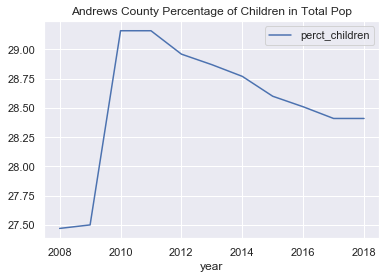

In [85]:
mid_by_county_by_yr.xs('andrews', level='county')[['child_pop', 'tot_pop']].plot()
plt.title('Andrews County Population')
mid_by_county_by_yr.xs('andrews', level='county')[['perct_children']].plot()
plt.title('Andrews County Percentage of Children in Total Pop')

In [86]:
midland_counties = list(midland.county.value_counts().index.sort_values())

In [87]:
midland_counties

['andrews',
 'borden',
 'coke',
 'concho',
 'crane',
 'crockett',
 'dawson',
 'ector',
 'gaines',
 'glasscock',
 'howard',
 'irion',
 'kimble',
 'loving',
 'martin',
 'mason',
 'mcculloch',
 'menard',
 'midland',
 'pecos',
 'reagan',
 'reeves',
 'schleicher',
 'sterling',
 'sutton',
 'terrell',
 'tomgreen',
 'upton',
 'ward',
 'winkler']

### Lets look at Andrews county in particular first...

In [88]:
andrews = mid_by_county_by_yr.xs('andrews', level='county')
andrews

,child_pop,perct_children,tot_pop
year,,,
2008,3821.0,27.47,13908
2009,3893.0,27.50,14156
2010,4312.0,29.16,14786
2011,4396.0,29.16,15076
2012,4443.0,28.96,15343
2013,4504.0,28.87,15603
2014,4563.0,28.77,15861
2015,4614.0,28.60,16133
2016,4670.0,28.51,16383


Text(0.5, 1.0, 'Andrews County Children Pop & Total Population')

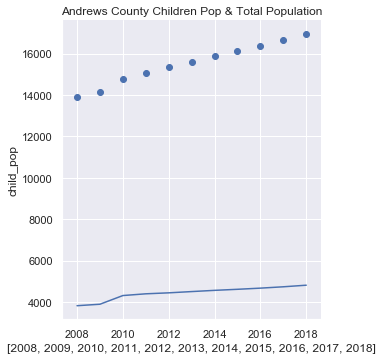

In [89]:
sns.relplot(x=list(mid_by_county_by_yr.xs('andrews', level='county').index), y='child_pop', data=mid_by_county_by_yr.xs('andrews', level='county'), kind='line')
plt.scatter(x=list(mid_by_county_by_yr.xs('andrews', level='county').index), y='tot_pop', data=mid_by_county_by_yr.xs('andrews', level='county'))
plt.title('Andrews County Children Pop & Total Population')


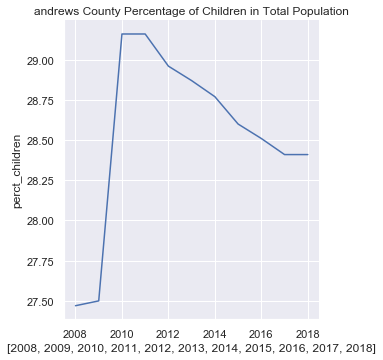

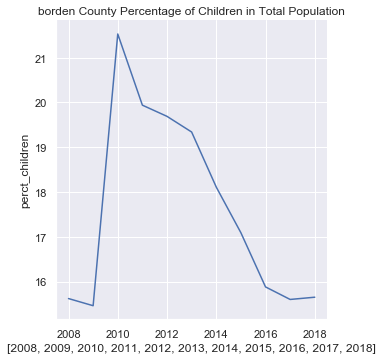

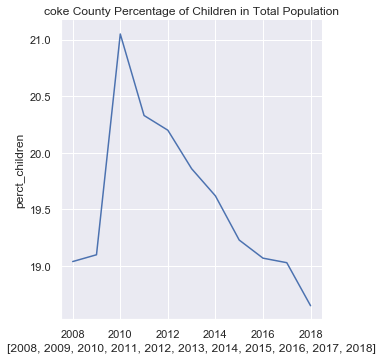

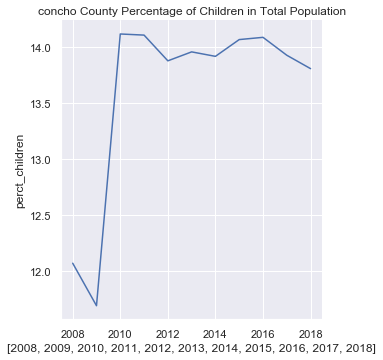

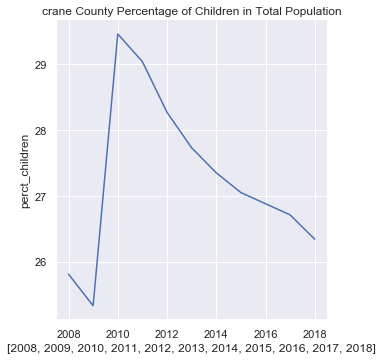

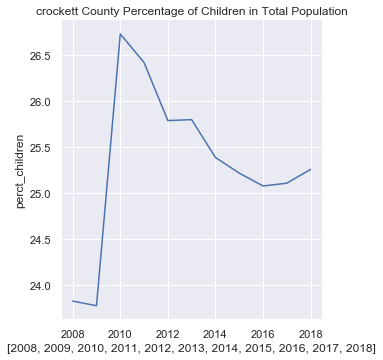

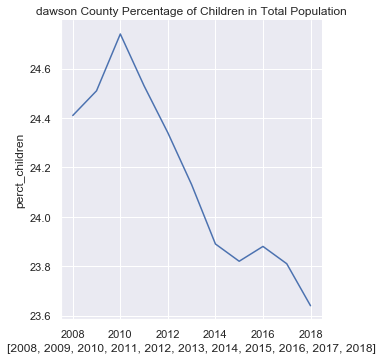

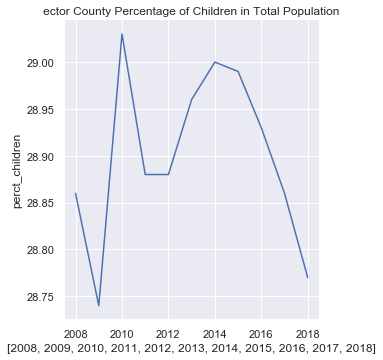

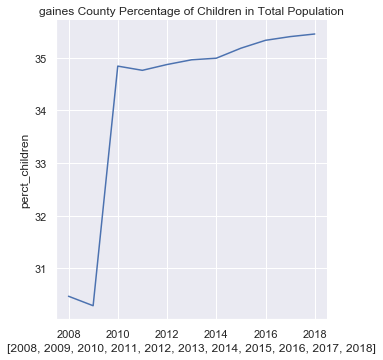

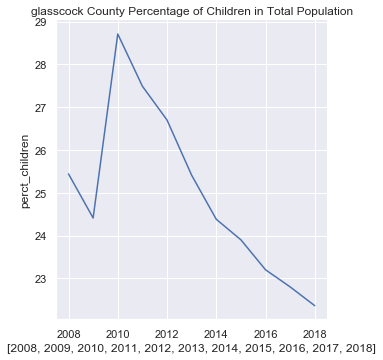

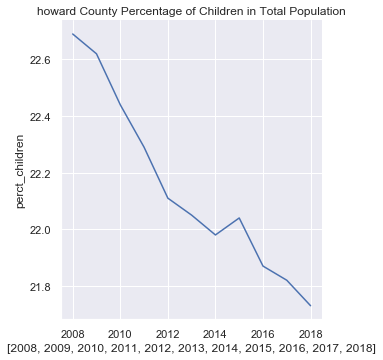

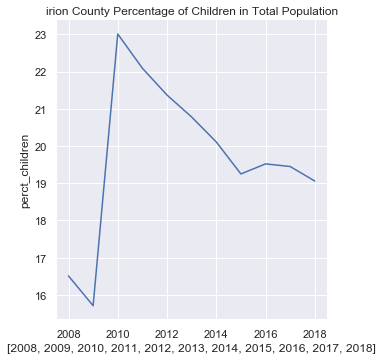

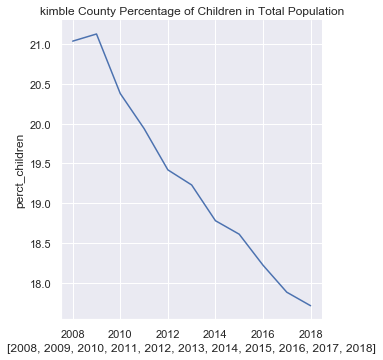

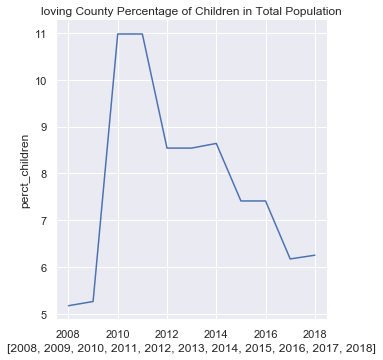

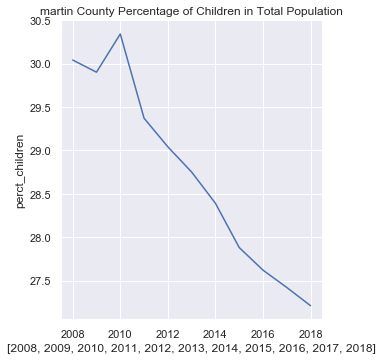

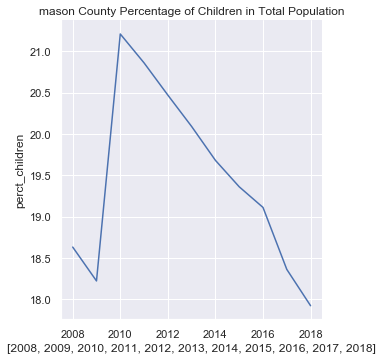

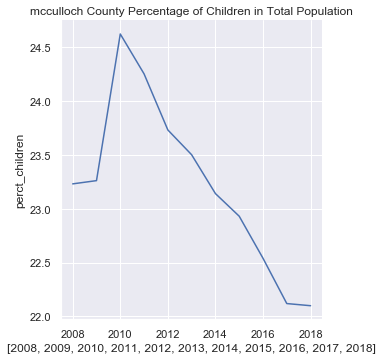

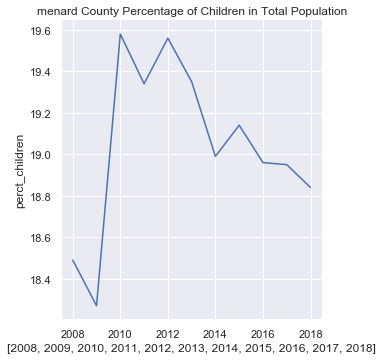

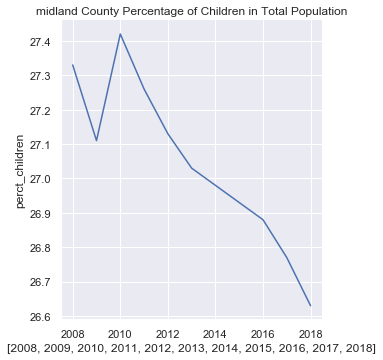

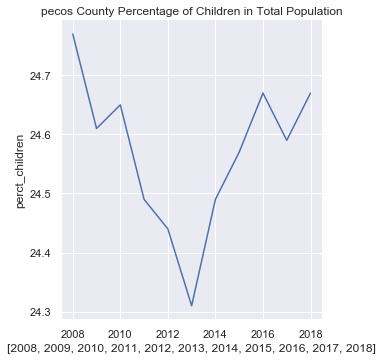

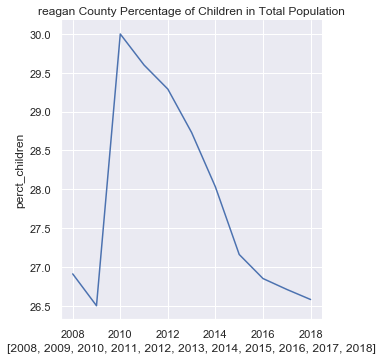

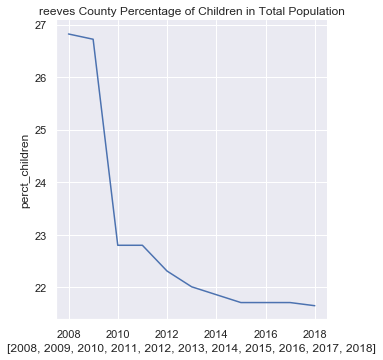

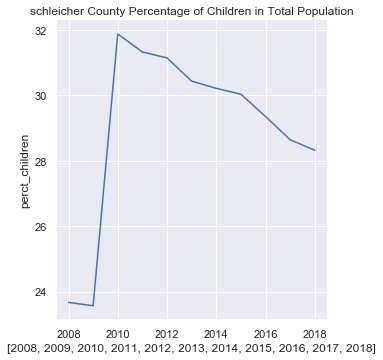

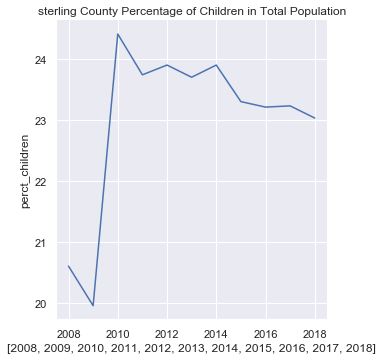

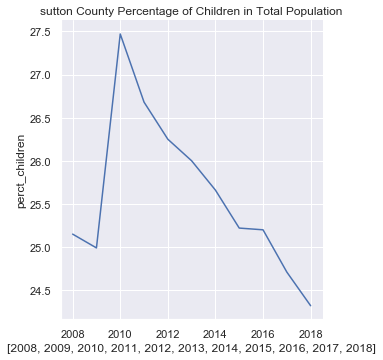

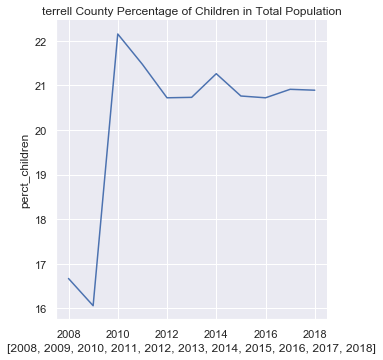

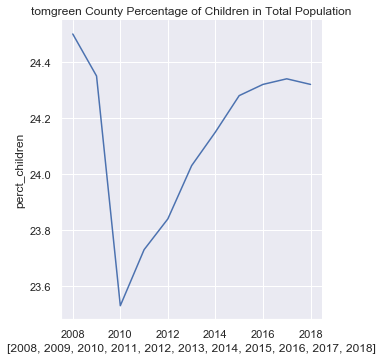

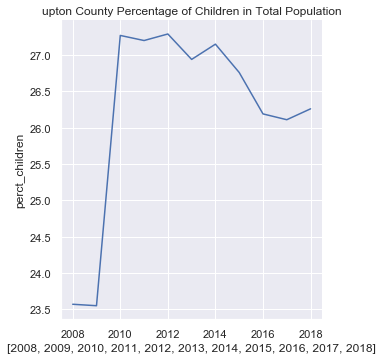

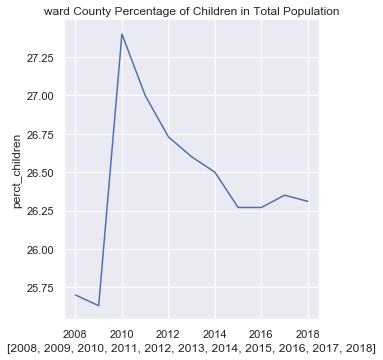

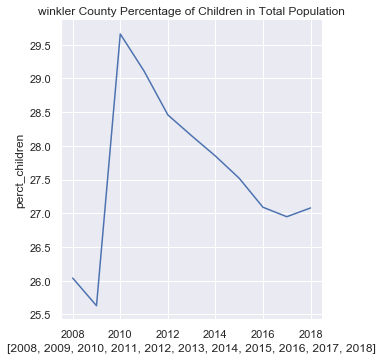

In [90]:
for element in midland_counties:
    sns.relplot(x=list(mid_by_county_by_yr.xs(element, level='county').index), y='perct_children', data=mid_by_county_by_yr.xs(element, level='county'), kind='line')
    plt.title(element+' County Percentage of Children in Total Population')
# plt.savefig()
plt.show()

### When analyzing the percentage of children in total population across all the different counties in Midland Region, there are some counties that do not follow the normal pattern of spiking in 2009 and then decreasing.

### What accounted for the spike in the percentage of children in the total population in 2009? 
### Why did some counties not exhibit this spike in 2009?

In [91]:
mid_by_county_by_yr.head()

child_pop  perct_children  tot_pop
county  year                                    
andrews 2008     3821.0           27.47    13908
        2009     3893.0           27.50    14156
        2010     4312.0           29.16    14786
        2011     4396.0           29.16    15076
        2012     4443.0           28.96    15343

In [92]:
mid_by_county_by_yr.xs(2008, level='year')

,child_pop,perct_children,tot_pop
county,,,
andrews,3821.0,27.47,13908
borden,109.0,15.62,698
coke,732.0,19.04,3844
concho,450.0,12.07,3729
crane,1039.0,25.81,4026
crockett,1006.0,23.83,4221
dawson,3400.0,24.41,13926
ector,37761.0,28.86,130849
gaines,4689.0,30.47,15389


In [93]:
# sns.relplot(x='tot_pop', y='perct_children', data=mid_by_county_by_yr, kind='line', hue='county')
# plt.title(element+' County Percentage of Children in Total Population')

# Time Series Analysis of Child Population

In [94]:
dfps.head()

,county,region,child_pop,perct_children,tot_pop,year
datetime,,,,,,
2008-01-01,anderson,Tyler,11237.0,19.91,56445,2008
2008-01-01,andrews,Midland,3821.0,27.47,13908,2008
2008-01-01,angelina,Beaumont,22131.0,26.64,83083,2008
2008-01-01,aransas,Edinburg,5020.0,19.82,25327,2008
2008-01-01,archer,Abilene,2216.0,23.96,9248,2008


In [95]:
dfps.groupby('county').head()

,county,region,child_pop,perct_children,tot_pop,year
datetime,,,,,,
2008-01-01,anderson,Tyler,11237.0,19.91,56445,2008
2008-01-01,andrews,Midland,3821.0,27.47,13908,2008
2008-01-01,angelina,Beaumont,22131.0,26.64,83083,2008
2008-01-01,aransas,Edinburg,5020.0,19.82,25327,2008
2008-01-01,archer,Abilene,2216.0,23.96,9248,2008
2008-01-01,armstrong,Lubbock,502.0,22.89,2193,2008
2008-01-01,atascosa,San Antonio,12615.0,28.78,43829,2008
2008-01-01,austin,Houston,6705.0,24.59,27270,2008
2008-01-01,bailey,Lubbock,1877.0,29.87,6283,2008


# Take a look at the San Antonio region first!

In [96]:
df_sa = dfps[dfps.region == 'San Antonio']

In [97]:
df_sa.head()

,county,region,child_pop,perct_children,tot_pop,year
datetime,,,,,,
2008-01-01,atascosa,San Antonio,12615.0,28.78,43829,2008
2008-01-01,bandera,San Antonio,4080.0,20.08,20314,2008
2008-01-01,bexar,San Antonio,434984.0,26.88,1618284,2008
2008-01-01,calhoun,San Antonio,5648.0,27.11,20833,2008
2008-01-01,comal,San Antonio,24847.0,22.57,110105,2008


In [98]:
df_sa1 = df_sa.groupby(['datetime'])['child_pop'].sum().reset_index()

In [99]:
df_sa1 = df_sa1.rename(columns = {'datetime':'ds', 'child_pop':'y'})

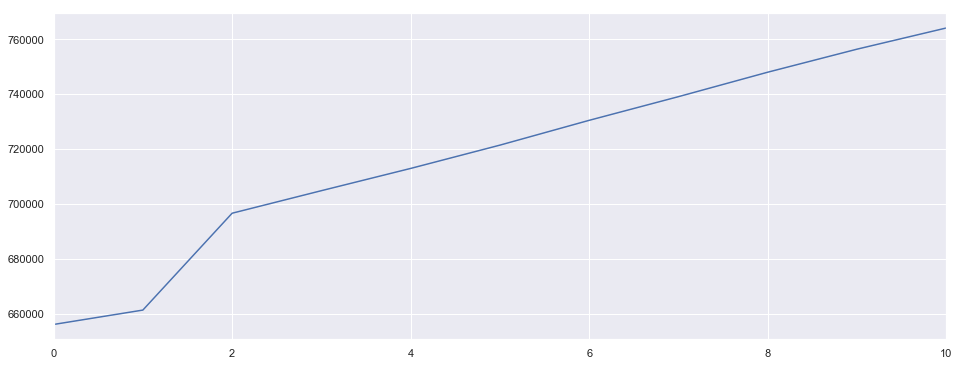

In [100]:
plt.figure(figsize=(16,6))
sns.tsplot(df_sa1.y)

In [101]:
df_sa1.y.min()

656179.0

In [102]:
df_sa1['cap'] = 950000
df_sa1['floor'] = 600000

m = Prophet(daily_seasonality=True, growth='logistic', changepoint_range=0.9)
m.fit(df_sa1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 8.0.


In [103]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 950000
future['floor'] = 600000
print(future.head())
print(future.tail())
print(df_sa.tail())

          ds     cap   floor
0 2008-01-01  950000  600000
1 2009-01-01  950000  600000
2 2010-01-01  950000  600000
3 2011-01-01  950000  600000
4 2012-01-01  950000  600000
             ds     cap   floor
1832 2022-12-28  950000  600000
1833 2022-12-29  950000  600000
1834 2022-12-30  950000  600000
1835 2022-12-31  950000  600000
1836 2023-01-01  950000  600000
              county       region  child_pop  perct_children  tot_pop  year
datetime                                                                   
2018-01-01    uvalde  San Antonio     7916.0           28.11    28161  2018
2018-01-01  valverde  San Antonio    15408.0           29.36    52475  2018
2018-01-01  victoria  San Antonio    23732.0           25.90    91624  2018
2018-01-01    wilson  San Antonio    12053.0           22.21    54265  2018
2018-01-01    zavala  San Antonio     3888.0           30.69    12670  2018


In [104]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1832,2022-12-28,839930.543418,828241.423639,851737.778368
1833,2022-12-29,839946.817299,827629.899107,852568.655252
1834,2022-12-30,839866.622230,827504.409500,852370.066713
1835,2022-12-31,839692.066302,828194.681668,851175.109235
1836,2023-01-01,839427.134464,827982.307069,852459.982902


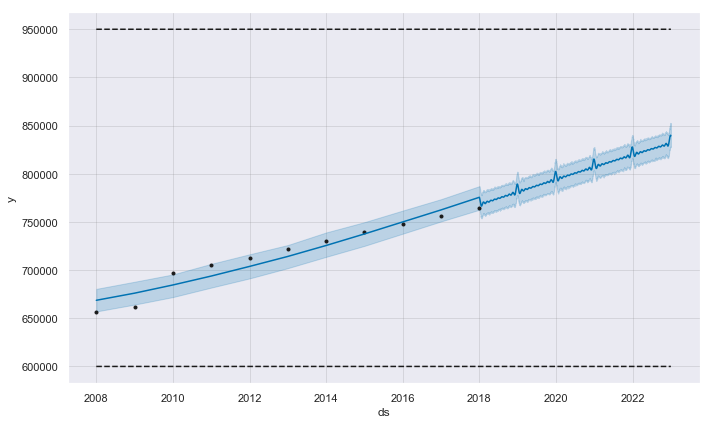

In [105]:
fig1 = m.plot(forecast)

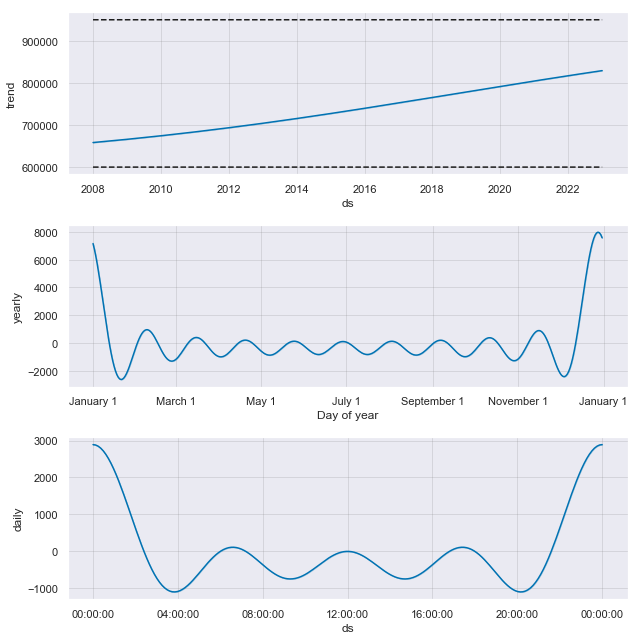

In [106]:
fig2 = m.plot_components(forecast)


In [107]:
from fbprophet.diagnostics import cross_validation, performance_metrics
# cross_validation(m, initial = 730, period = 180, horizon = 365, units = 'days')
df_cv = cross_validation(m, horizon='360 days')


df_p = performance_metrics(df_cv)
df_p.head(5)

INFO:fbprophet:Making 13 forecasts with cutoffs between 2011-02-07 00:00:00 and 2017-01-06 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 2.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 2.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.0.
INFO:fbprophet:n_changepoints greater than number of 

,horizon,mse,rmse,mae,mape,coverage
1,148 days,1.825846e+08,13512.387130,13512.387130,0.018951,0.0
3,154 days,1.746614e+08,13215.952347,13215.952347,0.018317,0.0
5,159 days,1.751087e+08,13232.865374,13232.865374,0.018113,0.0
7,164 days,2.102959e+08,14501.582372,14501.582372,0.019619,0.0
9,169 days,2.090188e+08,14457.481044,14457.481044,0.019326,0.0


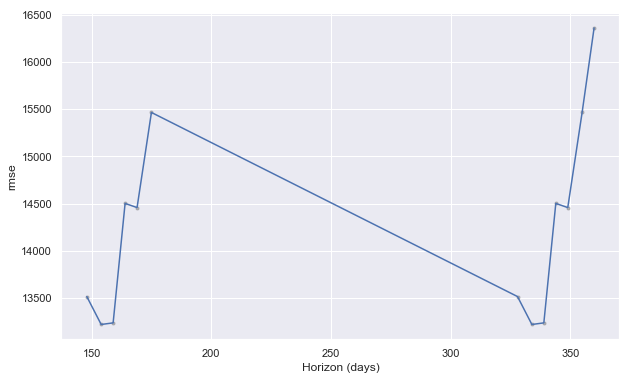

In [108]:
from fbprophet.plot import plot_cross_validation_metric, plot_forecast_component

# plot_forecast_component(m, forecast, 'yhat')

fig3 = plot_cross_validation_metric(df_cv, metric='rmse')

# MODEL

# LINEAR REGRESSION MODEL

In [109]:
df_sa.head()

,county,region,child_pop,perct_children,tot_pop,year
datetime,,,,,,
2008-01-01,atascosa,San Antonio,12615.0,28.78,43829,2008
2008-01-01,bandera,San Antonio,4080.0,20.08,20314,2008
2008-01-01,bexar,San Antonio,434984.0,26.88,1618284,2008
2008-01-01,calhoun,San Antonio,5648.0,27.11,20833,2008
2008-01-01,comal,San Antonio,24847.0,22.57,110105,2008


### The San Antonio region is composed of 28 counties including: 

In [110]:
list(df_sa.county.value_counts().index)

['karnes',
 'edwards',
 'bandera',
 'lasalle',
 'gonzales',
 'jackson',
 'dewitt',
 'kerr',
 'dimmit',
 'maverick',
 'lavaca',
 'comal',
 'gillespie',
 'kendall',
 'zavala',
 'medina',
 'bexar',
 'goliad',
 'calhoun',
 'wilson',
 'kinney',
 'uvalde',
 'victoria',
 'atascosa',
 'frio',
 'real',
 'guadalupe',
 'valverde']

In [111]:
df_sa.county.nunique()

28

In [112]:
df_sa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 308 entries, 2008-01-01 to 2018-01-01
Data columns (total 6 columns):
county            308 non-null object
region            308 non-null object
child_pop         308 non-null float64
perct_children    308 non-null float64
tot_pop           308 non-null int64
year              308 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 16.8+ KB


In [113]:
df_sa.describe()

,child_pop,perct_children,tot_pop,year
count,308.000000,308.000000,3.080000e+02,308.000000
mean,25624.178571,24.104610,9.857114e+04,2013.000000
std,88327.537359,3.989233,3.324637e+05,3.167424
min,407.000000,16.230000,1.921000e+03,2008.000000
25%,3427.000000,20.867500,1.372375e+04,2010.000000
50%,5300.500000,23.945000,2.224500e+04,2013.000000
75%,12615.000000,26.777500,5.042450e+04,2016.000000
max,515667.000000,34.110000,1.988364e+06,2018.000000


In [114]:
df_sa.reset_index()

,datetime,county,region,child_pop,perct_children,tot_pop,year
0,2008-01-01,atascosa,San Antonio,12615.0,28.78,43829,2008
1,2008-01-01,bandera,San Antonio,4080.0,20.08,20314,2008
2,2008-01-01,bexar,San Antonio,434984.0,26.88,1618284,2008
3,2008-01-01,calhoun,San Antonio,5648.0,27.11,20833,2008
4,2008-01-01,comal,San Antonio,24847.0,22.57,110105,2008
5,2008-01-01,dewitt,San Antonio,4422.0,21.93,20166,2008
6,2008-01-01,dimmit,San Antonio,2924.0,29.35,9964,2008
7,2008-01-01,edwards,San Antonio,410.0,21.34,1921,2008
8,2008-01-01,frio,San Antonio,4408.0,26.99,16333,2008
9,2008-01-01,gillespie,San Antonio,4643.0,19.13,24265,2008


In [115]:
df_sa_mean = df_sa.groupby(['datetime'])['tot_pop', 'child_pop'].mean()

In [116]:
df_sa_mean.head()

,tot_pop,child_pop
datetime,,
2008-01-01,88713.464286,23434.964286
2009-01-01,90340.250000,23622.178571
2010-01-01,93023.107143,24882.357143
2011-01-01,94831.250000,25175.714286
2012-01-01,96696.857143,25465.250000


In [117]:
df_sa_mean['year'] = df_sa_mean.index.year

In [118]:
df_sa_mean.head()

,tot_pop,child_pop,year
datetime,,,
2008-01-01,88713.464286,23434.964286,2008
2009-01-01,90340.250000,23622.178571,2009
2010-01-01,93023.107143,24882.357143,2010
2011-01-01,94831.250000,25175.714286,2011
2012-01-01,96696.857143,25465.250000,2012


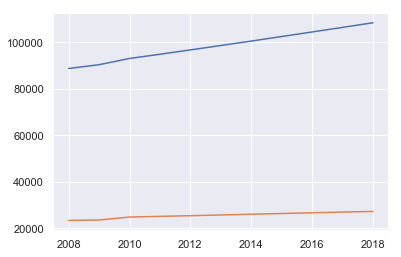

In [119]:
plt.plot(df_sa_mean[['tot_pop', 'child_pop']])

# Lets predict the total population growth of San Antonio first...

In [120]:
lm1 = LinearRegression()
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [121]:
lm1.fit(df_sa_mean[['year']], df_sa_mean.tot_pop)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
# df['predicted'] = lm.predict(df[['waiting']])

In [123]:
df_sa_mean['predicted'] = lm1.predict(df_sa_mean[['year']])

In [124]:
df_sa_mean.head()

,tot_pop,child_pop,year,predicted
datetime,,,,
2008-01-01,88713.464286,23434.964286,2008,88771.881494
2009-01-01,90340.250000,23622.178571,2009,90731.733766
2010-01-01,93023.107143,24882.357143,2010,92691.586039
2011-01-01,94831.250000,25175.714286,2011,94651.438312
2012-01-01,96696.857143,25465.250000,2012,96611.290584


In [125]:
lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

-3846611.4821428587
[1959.85227273]


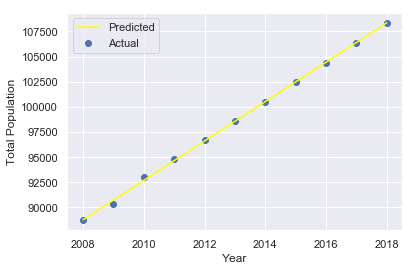

In [126]:
plt.scatter(df_sa_mean.year, df_sa_mean.tot_pop, label='Actual')
plt.plot(df_sa_mean.year, df_sa_mean.predicted, label='Predicted', c='yellow')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.legend()

In [127]:
pearsonr(df_sa_mean.year, df_sa_mean.tot_pop)

(0.9996292800612872, 2.127603662218926e-15)

In [128]:
print('Univariate - total_population = b + m * year')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])
print('Tot_pop = -3,846,611.48 + 1959.85 * year')
print('This is the linear regression equation for the mean total population of the San Antonio region.')

Univariate - total_population = b + m * year
    y-intercept (b): -3846611.48
    coefficient (m): 1959.85
Tot_pop = -3,846,611.48 + 1959.85 * year
This is the linear regression equation for the mean total population of the San Antonio region.


# Phase 2
### Compare the population growth of children with other parameters.
### Does child population growth relate to cases of unaccompanied minors apprehended by USBP at all?
### Does child population growth account for new immigrates, i.e., are immigrants counted among the population count?
### Does child population growth relate to cases of minors under control by the DFPS at all?

# IMPORT NEW DATA: 
<li> US Census FIPS Codes for the Counties in TX (To act as a key)
<li> US Border Patrol (USBP) Unaccompanied Minors (UAC) Apprehended over Years
<li> US Census Data (for TX) with 25 Columns of data
<li> Child Protective Services (CPS) Number of Children in DFPS (Department of Family Protective Services) Responsibility.

In [129]:
dfps.head()

,county,region,child_pop,perct_children,tot_pop,year
datetime,,,,,,
2008-01-01,anderson,Tyler,11237.0,19.91,56445,2008
2008-01-01,andrews,Midland,3821.0,27.47,13908,2008
2008-01-01,angelina,Beaumont,22131.0,26.64,83083,2008
2008-01-01,aransas,Edinburg,5020.0,19.82,25327,2008
2008-01-01,archer,Abilene,2216.0,23.96,9248,2008


## First start with the FIPS Codes for the counties because this is the easiest and will allow for further joins.

In [130]:
df = dfps.copy()

In [131]:
df.head()

,county,region,child_pop,perct_children,tot_pop,year
datetime,,,,,,
2008-01-01,anderson,Tyler,11237.0,19.91,56445,2008
2008-01-01,andrews,Midland,3821.0,27.47,13908,2008
2008-01-01,angelina,Beaumont,22131.0,26.64,83083,2008
2008-01-01,aransas,Edinburg,5020.0,19.82,25327,2008
2008-01-01,archer,Abilene,2216.0,23.96,9248,2008


In [132]:
df.county.value_counts()

yoakum        11
sutton        11
brewster      11
victoria      11
coleman       11
johnson       11
king          11
lipscomb      11
webb          11
howard        11
gillespie     11
coke          11
brown         11
chambers      11
somervell     11
reeves        11
menard        11
sterling      11
fisher        11
bee           11
starr         11
baylor        11
hutchinson    11
brazoria      11
rains         11
jackson       11
sherman       11
scurry        11
liveoak       11
mcculloch     11
              ..
coryell       11
glasscock     11
roberts       11
cottle        11
cass          11
rockwall      11
guadalupe     11
duval         11
hays          11
limestone     11
kinney        11
lee           11
erath         11
childress     11
jimwells      11
jones         11
mcmullen      11
palopinto     11
nueces        11
harris        11
hunt          11
maverick      11
bell          11
hale          11
hood          11
ochiltree     11
mills         11
vanzandt      

In [133]:
# fips = pd.read_csv(path+fipsfile)

In [134]:
fips = acquire.get_fips_codes()

In [135]:
fips.head()

,FIPS,Name,State
0,48001,Anderson,TX
1,48003,Andrews,TX
2,48005,Angelina,TX
3,48007,Aransas,TX
4,48009,Archer,TX


In [136]:
fips = fips.drop(columns=("State"))

In [137]:
fips['Name'] = fips['Name'].str.lower().str.replace(' ','')

In [138]:
fips.head()

,FIPS,Name
0,48001,anderson
1,48003,andrews
2,48005,angelina
3,48007,aransas
4,48009,archer


In [139]:
fips.tail(25)

,FIPS,Name
229,48459,upshur
230,48461,upton
231,48463,uvalde
232,48465,valverde
233,48467,vanzandt
234,48469,victoria
235,48471,walker
236,48473,waller
237,48475,ward
238,48477,washington


In [140]:
df = df.merge(fips, how='left', left_on='county', right_on='Name')

In [141]:
df.head()

,county,region,child_pop,perct_children,tot_pop,year,FIPS,Name
0,anderson,Tyler,11237.0,19.91,56445,2008,48001,anderson
1,andrews,Midland,3821.0,27.47,13908,2008,48003,andrews
2,angelina,Beaumont,22131.0,26.64,83083,2008,48005,angelina
3,aransas,Edinburg,5020.0,19.82,25327,2008,48007,aransas
4,archer,Abilene,2216.0,23.96,9248,2008,48009,archer


In [142]:
df = df.drop(columns=('Name'))

In [143]:
df.head()

,county,region,child_pop,perct_children,tot_pop,year,FIPS
0,anderson,Tyler,11237.0,19.91,56445,2008,48001
1,andrews,Midland,3821.0,27.47,13908,2008,48003
2,angelina,Beaumont,22131.0,26.64,83083,2008,48005
3,aransas,Edinburg,5020.0,19.82,25327,2008,48007
4,archer,Abilene,2216.0,23.96,9248,2008,48009


In [144]:
df.dtypes

county             object
region             object
child_pop         float64
perct_children    float64
tot_pop             int64
year                int64
FIPS                int64
dtype: object

In [145]:
df.isnull().sum()

county            0
region            0
child_pop         0
perct_children    0
tot_pop           0
year              0
FIPS              0
dtype: int64

## Okay, now we can proceed to joining the next dataframe with this one...

# Read in the USBP UAC Data, Includes the Years: 2010 - 2018

In [146]:
# uac = pd.read_csv(path+usbp_uac)

In [147]:
uac = acquire.get_bp_data()

In [148]:
uac.head()

,Year,County,Yearly Total
0,2010,Presidio,197
1,2010,Val Verde,"1,014"
2,2010,Falls,448
3,2010,El Paso,"1,011"
4,2010,Webb,"1,570"


In [149]:
uac = uac.rename(str.lower, axis='columns')

In [150]:
uac.head()

,year,county,yearly total
0,2010,Presidio,197
1,2010,Val Verde,"1,014"
2,2010,Falls,448
3,2010,El Paso,"1,011"
4,2010,Webb,"1,570"


In [151]:
uac = uac.rename(columns={'yearly total':'total_uac'})

In [152]:
uac.dtypes

year          int64
county       object
total_uac    object
dtype: object

In [153]:
uac['total_uac'] = uac['total_uac'].str.replace(',','')

In [154]:
uac['total_uac'] = uac['total_uac'].astype('int64')

In [155]:
uac.head()

,year,county,total_uac
0,2010,Presidio,197
1,2010,Val Verde,1014
2,2010,Falls,448
3,2010,El Paso,1011
4,2010,Webb,1570


In [156]:
uac.dtypes

year          int64
county       object
total_uac     int64
dtype: object

In [157]:
uac['county'] = uac.county.str.lower().str.replace(' ', '')

In [158]:
uac.head()

,year,county,total_uac
0,2010,presidio,197
1,2010,valverde,1014
2,2010,falls,448
3,2010,elpaso,1011
4,2010,webb,1570


In [159]:
df.head()

,county,region,child_pop,perct_children,tot_pop,year,FIPS
0,anderson,Tyler,11237.0,19.91,56445,2008,48001
1,andrews,Midland,3821.0,27.47,13908,2008,48003
2,angelina,Beaumont,22131.0,26.64,83083,2008,48005
3,aransas,Edinburg,5020.0,19.82,25327,2008,48007
4,archer,Abilene,2216.0,23.96,9248,2008,48009


In [160]:
df[df.county == 'valverde']

,county,region,child_pop,perct_children,tot_pop,year,FIPS
232,valverde,San Antonio,14263.0,29.80,47858,2008,48465
486,valverde,San Antonio,14196.0,29.42,48257,2009,48465
740,valverde,San Antonio,14564.0,29.80,48879,2010,48465
994,valverde,San Antonio,14680.0,29.72,49389,2011,48465
1248,valverde,San Antonio,14796.0,29.68,49857,2012,48465
1502,valverde,San Antonio,14924.0,29.66,50312,2013,48465
1756,valverde,San Antonio,15020.0,29.59,50762,2014,48465
2010,valverde,San Antonio,15158.0,29.60,51217,2015,48465
2264,valverde,San Antonio,15245.0,29.52,51636,2016,48465
2518,valverde,San Antonio,15332.0,29.46,52041,2017,48465


In [161]:
df.dtypes

county             object
region             object
child_pop         float64
perct_children    float64
tot_pop             int64
year                int64
FIPS                int64
dtype: object

In [162]:
df = df.merge(uac, how='left', left_on=['county','year'], right_on=['county','year'])

In [163]:
df[df.county == 'valverde']

,county,region,child_pop,perct_children,tot_pop,year,FIPS,total_uac
232,valverde,San Antonio,14263.0,29.80,47858,2008,48465,NaN
486,valverde,San Antonio,14196.0,29.42,48257,2009,48465,NaN
740,valverde,San Antonio,14564.0,29.80,48879,2010,48465,1014.0
994,valverde,San Antonio,14680.0,29.72,49389,2011,48465,1113.0
1248,valverde,San Antonio,14796.0,29.68,49857,2012,48465,1618.0
1502,valverde,San Antonio,14924.0,29.66,50312,2013,48465,2135.0
1756,valverde,San Antonio,15020.0,29.59,50762,2014,48465,3268.0
2010,valverde,San Antonio,15158.0,29.60,51217,2015,48465,2285.0
2264,valverde,San Antonio,15245.0,29.52,51636,2016,48465,2689.0
2518,valverde,San Antonio,15332.0,29.46,52041,2017,48465,1349.0


In [164]:
df.head()

,county,region,child_pop,perct_children,tot_pop,year,FIPS,total_uac
0,anderson,Tyler,11237.0,19.91,56445,2008,48001,NaN
1,andrews,Midland,3821.0,27.47,13908,2008,48003,NaN
2,angelina,Beaumont,22131.0,26.64,83083,2008,48005,NaN
3,aransas,Edinburg,5020.0,19.82,25327,2008,48007,NaN
4,archer,Abilene,2216.0,23.96,9248,2008,48009,NaN


## Because there are not a lot of datapoints in the USBP Dataset, there will be lots of Null values in the resulting merge. However, we do want to keep this information to compare the child population against the Unaccompanied Alien Children apprehended by the USBP for 2010-2018.

## Next, we can bring in the:
# Department of Family and Protective Services Data, Includes the Years: 2008-2018

In [165]:
# dfps_case = pd.read_csv(path+file2)

In [166]:
dfps_case = acquire.get_dfps_data()

In [167]:
dfps_case.head()

,Fiscal Year,County,Region,Children in DFPS Responsibility
0,2008,Anderson,4-Tyler,114
1,2008,Andrews,9-Midland,32
2,2008,Angelina,5-Beaumont,158
3,2008,Aransas,11-Edinburg,50
4,2008,Archer,2-Abilene,1


In [168]:
dfps_case = dfps_case.rename(str.lower, axis='columns')

In [169]:
dfps_case.head()

,fiscal year,county,region,children in dfps responsibility
0,2008,Anderson,4-Tyler,114
1,2008,Andrews,9-Midland,32
2,2008,Angelina,5-Beaumont,158
3,2008,Aransas,11-Edinburg,50
4,2008,Archer,2-Abilene,1


In [170]:
dfps_case = dfps_case.rename(columns={'fiscal year': 'year', 'children in dfps responsibility':'dfps_children'})

In [171]:
dfps_case.head()

,year,county,region,dfps_children
0,2008,Anderson,4-Tyler,114
1,2008,Andrews,9-Midland,32
2,2008,Angelina,5-Beaumont,158
3,2008,Aransas,11-Edinburg,50
4,2008,Archer,2-Abilene,1


In [172]:
dfps_case.dtypes

year              int64
county           object
region           object
dfps_children     int64
dtype: object

In [173]:
dfps_case['county'] = dfps_case['county'].str.lower().str.replace(' ', '')

In [174]:
dfps_case.head()

,year,county,region,dfps_children
0,2008,anderson,4-Tyler,114
1,2008,andrews,9-Midland,32
2,2008,angelina,5-Beaumont,158
3,2008,aransas,11-Edinburg,50
4,2008,archer,2-Abilene,1


In [175]:
dfps_case = dfps_case.drop(columns='region')

In [176]:
dfps_case.head()

,year,county,dfps_children
0,2008,anderson,114
1,2008,andrews,32
2,2008,angelina,158
3,2008,aransas,50
4,2008,archer,1


In [177]:
df.head()

,county,region,child_pop,perct_children,tot_pop,year,FIPS,total_uac
0,anderson,Tyler,11237.0,19.91,56445,2008,48001,NaN
1,andrews,Midland,3821.0,27.47,13908,2008,48003,NaN
2,angelina,Beaumont,22131.0,26.64,83083,2008,48005,NaN
3,aransas,Edinburg,5020.0,19.82,25327,2008,48007,NaN
4,archer,Abilene,2216.0,23.96,9248,2008,48009,NaN


In [178]:
df = df.merge(dfps_case, how='left', left_on = ['county', 'year'], right_on=['county', 'year'])

In [179]:
df.head()

,county,region,child_pop,perct_children,tot_pop,year,FIPS,total_uac,dfps_children
0,anderson,Tyler,11237.0,19.91,56445,2008,48001,NaN,114.0
1,andrews,Midland,3821.0,27.47,13908,2008,48003,NaN,32.0
2,angelina,Beaumont,22131.0,26.64,83083,2008,48005,NaN,158.0
3,aransas,Edinburg,5020.0,19.82,25327,2008,48007,NaN,50.0
4,archer,Abilene,2216.0,23.96,9248,2008,48009,NaN,1.0


In [180]:
df.tail()

,county,region,child_pop,perct_children,tot_pop,year,FIPS,total_uac,dfps_children
2789,wood,Tyler,8887.0,18.79,47309,2018,48499,NaN,120.0
2790,yoakum,Lubbock,2704.0,29.40,9197,2018,48501,NaN,7.0
2791,young,Abilene,4625.0,23.57,19623,2018,48503,NaN,64.0
2792,zapata,Edinburg,5659.0,34.42,16440,2018,48505,NaN,21.0
2793,zavala,San Antonio,3888.0,30.69,12670,2018,48507,NaN,24.0


## Lastly, we can merge the BIG dataset with a bunch of US Census information. This has data from the 2000 and 2010 census.
# Census Data, 2000 & 2010, with 25 Columns, All of the USA

In [181]:
# census = pd.read_csv(path+census)

In [182]:
census = acquire.get_census_data()

In [183]:
census.head()

,Unnamed: 0,growth,FIPS,pop2010,pop2000,age_under_5,age_under_18,age_over_65,female,black,...,bachelors,mean_work_travel,home_ownership,housing_multi_unit,median_val_owner_occupied,persons_per_household,per_capita_income,poverty,sales_per_capita,density
0,1,24.959355,1001,54571,43671,6.6,26.8,12.0,51.3,17.7,...,21.7,25.1,77.5,7.2,133900.0,2.70,24568,10.6,12003,91.8
1,2,29.804508,1003,182265,140415,6.1,23.0,16.8,51.1,9.4,...,26.8,25.8,76.7,22.6,177200.0,2.50,26469,12.2,17166,114.6
2,3,-5.444590,1005,27457,29038,6.2,21.9,14.2,46.9,46.9,...,13.5,23.8,68.0,11.1,88200.0,2.52,15875,25.0,6334,31.0
3,4,10.030731,1007,22915,20826,6.0,22.7,12.7,46.3,22.0,...,10.0,28.3,82.9,6.6,81200.0,3.02,19918,12.6,5804,36.8
4,5,12.343211,1009,57322,51024,6.3,24.6,14.7,50.5,1.3,...,12.5,33.2,82.0,3.7,113700.0,2.73,21070,13.4,5622,88.9


In [184]:
census = census.drop(columns='Unnamed: 0')

In [185]:
census.head()

,growth,FIPS,pop2010,pop2000,age_under_5,age_under_18,age_over_65,female,black,hispanic,...,bachelors,mean_work_travel,home_ownership,housing_multi_unit,median_val_owner_occupied,persons_per_household,per_capita_income,poverty,sales_per_capita,density
0,24.959355,1001,54571,43671,6.6,26.8,12.0,51.3,17.7,2.4,...,21.7,25.1,77.5,7.2,133900.0,2.70,24568,10.6,12003,91.8
1,29.804508,1003,182265,140415,6.1,23.0,16.8,51.1,9.4,4.4,...,26.8,25.8,76.7,22.6,177200.0,2.50,26469,12.2,17166,114.6
2,-5.444590,1005,27457,29038,6.2,21.9,14.2,46.9,46.9,5.1,...,13.5,23.8,68.0,11.1,88200.0,2.52,15875,25.0,6334,31.0
3,10.030731,1007,22915,20826,6.0,22.7,12.7,46.3,22.0,1.8,...,10.0,28.3,82.9,6.6,81200.0,3.02,19918,12.6,5804,36.8
4,12.343211,1009,57322,51024,6.3,24.6,14.7,50.5,1.3,8.1,...,12.5,33.2,82.0,3.7,113700.0,2.73,21070,13.4,5622,88.9


In [186]:
census.columns

Index(['growth', 'FIPS', 'pop2010', 'pop2000', 'age_under_5', 'age_under_18',
       'age_over_65', 'female', 'black', 'hispanic', 'white_not_hispanic',
       'no_move_in_one_plus_year', 'foreign_born', 'foreign_spoken_at_home',
       'hs_grad', 'bachelors', 'mean_work_travel', 'home_ownership',
       'housing_multi_unit', 'median_val_owner_occupied',
       'persons_per_household', 'per_capita_income', 'poverty',
       'sales_per_capita', 'density'],
      dtype='object')

In [187]:
census = census.rename(columns={'growth':'growth_2000_2010', 'age_under_5':'age_under_5_2010', 'age_under_18': 'age_under_18_2010',\
                       'age_over_65': 'age_over_65_2010', 'female': 'female_2010', 'bla.]ck': 'black_2010', 'hispanic':'hispanic_2010',\
                      'sales_per_capita': 'sales_per_capita_2007', 'white_not_hispanic': 'white_not_hispanic_2010', 'no_move_in_one_plus_year': 'no_move_in_one_plus_year_0610',\
                      'foreign_born': 'foreign_born_0610', 'foreign_spoken_at_home': 'foreign_spoken_at_home_0610', 'hs_grad':'hs_grad_0610',\
                      'bachelors':'bachelors_0610', 'mean_work_travel': 'mean_work_travel_0610', 'home_ownership':'home_ownership_0610',\
                      'housing_multi_unit':'housing_multi_unit_0610', 'median_val_owner_occupied':'median_val_owner_occupied_0610',\
                      'persons_per_household':'persons_per_household_0610', 'per_capita_income':'per_capita_income_0610', 'poverty': 'poverty_0610',\
                      'density':'density_2010', 'black':'black_2010'})

In [188]:
census.head()

,growth_2000_2010,FIPS,pop2010,pop2000,age_under_5_2010,age_under_18_2010,age_over_65_2010,female_2010,black_2010,hispanic_2010,...,bachelors_0610,mean_work_travel_0610,home_ownership_0610,housing_multi_unit_0610,median_val_owner_occupied_0610,persons_per_household_0610,per_capita_income_0610,poverty_0610,sales_per_capita_2007,density_2010
0,24.959355,1001,54571,43671,6.6,26.8,12.0,51.3,17.7,2.4,...,21.7,25.1,77.5,7.2,133900.0,2.70,24568,10.6,12003,91.8
1,29.804508,1003,182265,140415,6.1,23.0,16.8,51.1,9.4,4.4,...,26.8,25.8,76.7,22.6,177200.0,2.50,26469,12.2,17166,114.6
2,-5.444590,1005,27457,29038,6.2,21.9,14.2,46.9,46.9,5.1,...,13.5,23.8,68.0,11.1,88200.0,2.52,15875,25.0,6334,31.0
3,10.030731,1007,22915,20826,6.0,22.7,12.7,46.3,22.0,1.8,...,10.0,28.3,82.9,6.6,81200.0,3.02,19918,12.6,5804,36.8
4,12.343211,1009,57322,51024,6.3,24.6,14.7,50.5,1.3,8.1,...,12.5,33.2,82.0,3.7,113700.0,2.73,21070,13.4,5622,88.9


In [189]:
df.head()

,county,region,child_pop,perct_children,tot_pop,year,FIPS,total_uac,dfps_children
0,anderson,Tyler,11237.0,19.91,56445,2008,48001,NaN,114.0
1,andrews,Midland,3821.0,27.47,13908,2008,48003,NaN,32.0
2,angelina,Beaumont,22131.0,26.64,83083,2008,48005,NaN,158.0
3,aransas,Edinburg,5020.0,19.82,25327,2008,48007,NaN,50.0
4,archer,Abilene,2216.0,23.96,9248,2008,48009,NaN,1.0


In [190]:
full = df.merge(census, how='left', left_on ='FIPS', right_on='FIPS')

In [191]:
full.tail()

,county,region,child_pop,perct_children,tot_pop,year,FIPS,total_uac,dfps_children,growth_2000_2010,...,bachelors_0610,mean_work_travel_0610,home_ownership_0610,housing_multi_unit_0610,median_val_owner_occupied_0610,persons_per_household_0610,per_capita_income_0610,poverty_0610,sales_per_capita_2007,density_2010
2789,wood,Tyler,8887.0,18.79,47309,2018,48499,NaN,120.0,14.181541,...,16.5,29.7,81.4,4.5,94800.0,2.45,21682.0,14.0,9072.0,65.0
2790,yoakum,Lubbock,2704.0,29.40,9197,2018,48501,NaN,7.0,7.607211,...,15.0,18.1,85.2,3.4,61000.0,2.93,19937.0,25.0,4976.0,9.9
2791,young,Abilene,4625.0,23.57,19623,2018,48503,NaN,64.0,3.382935,...,13.6,15.9,69.1,10.6,69400.0,2.42,24656.0,15.6,10447.0,20.3
2792,zapata,Edinburg,5659.0,34.42,16440,2018,48505,NaN,21.0,15.071417,...,9.6,16.4,75.9,3.5,47100.0,3.13,13915.0,37.6,4586.0,14.0
2793,zavala,San Antonio,3888.0,30.69,12670,2018,48507,NaN,24.0,0.663793,...,7.7,15.5,67.8,14.7,36900.0,3.17,10180.0,43.0,2860.0,9.0


In [192]:
full.shape

(2794, 33)

In [193]:
full[full.FIPS == 48469]

,county,region,child_pop,perct_children,tot_pop,year,FIPS,total_uac,dfps_children,growth_2000_2010,...,bachelors_0610,mean_work_travel_0610,home_ownership_0610,housing_multi_unit_0610,median_val_owner_occupied_0610,persons_per_household_0610,per_capita_income_0610,poverty_0610,sales_per_capita_2007,density_2010
234,victoria,San Antonio,23198.0,26.73,86797,2008,48469,NaN,207.0,3.216868,...,16.9,20.9,66.2,19.4,98200.0,2.65,24146.0,16.4,16648.0,98.4
488,victoria,San Antonio,23290.0,26.54,87757,2009,48469,NaN,196.0,3.216868,...,16.9,20.9,66.2,19.4,98200.0,2.65,24146.0,16.4,16648.0,98.4
742,victoria,San Antonio,23177.0,26.70,86793,2010,48469,NaN,164.0,3.216868,...,16.9,20.9,66.2,19.4,98200.0,2.65,24146.0,16.4,16648.0,98.4
996,victoria,San Antonio,23145.0,26.50,87333,2011,48469,NaN,206.0,3.216868,...,16.9,20.9,66.2,19.4,98200.0,2.65,24146.0,16.4,16648.0,98.4
1250,victoria,San Antonio,23177.0,26.35,87952,2012,48469,NaN,227.0,3.216868,...,16.9,20.9,66.2,19.4,98200.0,2.65,24146.0,16.4,16648.0,98.4
1504,victoria,San Antonio,23285.0,26.28,88593,2013,48469,NaN,252.0,3.216868,...,16.9,20.9,66.2,19.4,98200.0,2.65,24146.0,16.4,16648.0,98.4
1758,victoria,San Antonio,23364.0,26.19,89210,2014,48469,NaN,255.0,3.216868,...,16.9,20.9,66.2,19.4,98200.0,2.65,24146.0,16.4,16648.0,98.4
2012,victoria,San Antonio,23457.0,26.11,89831,2015,48469,NaN,220.0,3.216868,...,16.9,20.9,66.2,19.4,98200.0,2.65,24146.0,16.4,16648.0,98.4
2266,victoria,San Antonio,23558.0,26.06,90413,2016,48469,NaN,213.0,3.216868,...,16.9,20.9,66.2,19.4,98200.0,2.65,24146.0,16.4,16648.0,98.4
2520,victoria,San Antonio,23649.0,25.98,91033,2017,48469,NaN,190.0,3.216868,...,16.9,20.9,66.2,19.4,98200.0,2.65,24146.0,16.4,16648.0,98.4


In [194]:
full.to_csv('full_df_censusTXchildren.csv')

In [195]:
full.head()

,county,region,child_pop,perct_children,tot_pop,year,FIPS,total_uac,dfps_children,growth_2000_2010,...,bachelors_0610,mean_work_travel_0610,home_ownership_0610,housing_multi_unit_0610,median_val_owner_occupied_0610,persons_per_household_0610,per_capita_income_0610,poverty_0610,sales_per_capita_2007,density_2010
0,anderson,Tyler,11237.0,19.91,56445,2008,48001,NaN,114.0,6.077047,...,11.3,23.8,73.7,8.0,81000.0,2.86,17465.0,16.5,8731.0,55.0
1,andrews,Midland,3821.0,27.47,13908,2008,48003,NaN,32.0,13.703476,...,12.4,21.7,79.9,9.5,86600.0,2.70,29605.0,17.1,7480.0,9.9
2,angelina,Beaumont,22131.0,26.64,83083,2008,48005,NaN,158.0,8.287782,...,15.9,20.8,69.2,11.2,81300.0,2.64,20104.0,17.8,14216.0,108.8
3,aransas,Edinburg,5020.0,19.82,25327,2008,48007,NaN,50.0,2.938170,...,23.9,18.6,74.3,12.8,129900.0,2.29,25610.0,17.4,9929.0,91.9
4,archer,Abilene,2216.0,23.96,9248,2008,48009,NaN,1.0,2.258866,...,18.8,19.3,81.1,3.4,93500.0,2.67,23882.0,10.0,4425.0,10.0
